In [58]:
#import required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#read sale data.csv
data = pd.read_csv("/Users/changlu/Downloads/sales_data.csv")
data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [60]:
#drop duplicates
data.drop_duplicates(inplace=True)
data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
996,Product_36,NaN,46.19,9.0,2024-09-23
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


In [61]:
#drop rows with unknown regions
data = data.dropna(subset='Region')
data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21
995,NaN,Region_7,31.83,13.0,2024-09-22
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


In [62]:
#create a column called "Revenue" by multiplying "Price" and "Units sold"
data['Revenue'] = data['Price'] * data['Units Sold']
data

/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_73248/1044972516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['Price'] * data['Units Sold']


,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10.0,2022-01-01,759.60
1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
995,NaN,Region_7,31.83,13.0,2024-09-22,413.79
997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


In [63]:
#fill unknown "prices" and "units sold" with mean numbers to avoid error
data['Price'].fillna((data['Price'].mean()), inplace=True)
data['Units Sold'].fillna((data['Units Sold'].mean()), inplace=True)
data


/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_73248/1957294785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'].fillna((data['Price'].mean()), inplace=True)
/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_73248/1957294785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Units Sold'].fillna((data['Units Sold'].mean()), inplace=True)


,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10.0,2022-01-01,759.60
1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
995,NaN,Region_7,31.83,13.0,2024-09-22,413.79
997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


Data cleaning completed, continue to plot process

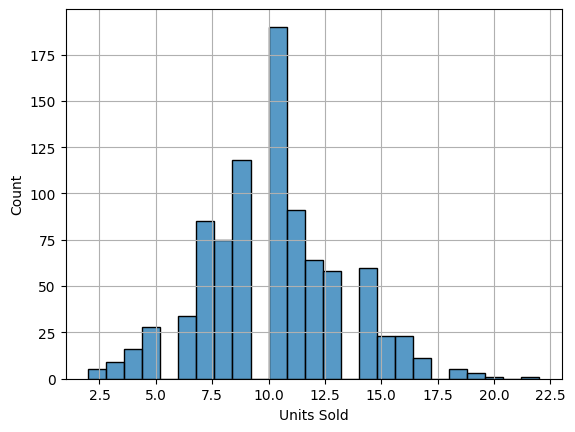

In [64]:
#Check overall distribution of "Units Sold":  (with histplot and boxplot)
sns.histplot(data['Units Sold'])
plt.grid()

<Axes: >

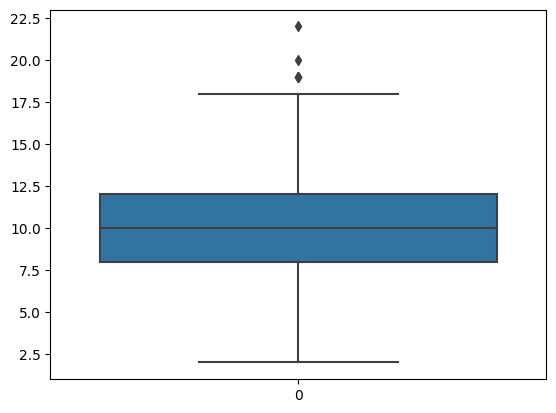

In [65]:
sns.boxplot(data['Units Sold'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Region_6'),
  Text(1, 0, 'Region_1'),
  Text(2, 0, 'Region_3'),
  Text(3, 0, 'Region_7'),
  Text(4, 0, 'Region_9'),
  Text(5, 0, 'Region_2'),
  Text(6, 0, 'Region_4'),
  Text(7, 0, 'Region_5'),
  Text(8, 0, 'Region_8'),
  Text(9, 0, 'Region_10')])

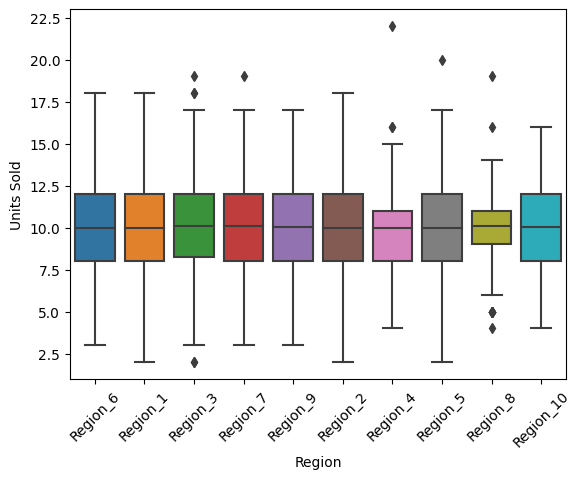

In [66]:
#Observe Units Sold based on different regions:
sns.boxplot(data = data, x = 'Region', y = 'Units Sold' )
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Region_6'),
  Text(1, 0, 'Region_1'),
  Text(2, 0, 'Region_3'),
  Text(3, 0, 'Region_7'),
  Text(4, 0, 'Region_9'),
  Text(5, 0, 'Region_2'),
  Text(6, 0, 'Region_4'),
  Text(7, 0, 'Region_5'),
  Text(8, 0, 'Region_8'),
  Text(9, 0, 'Region_10')])

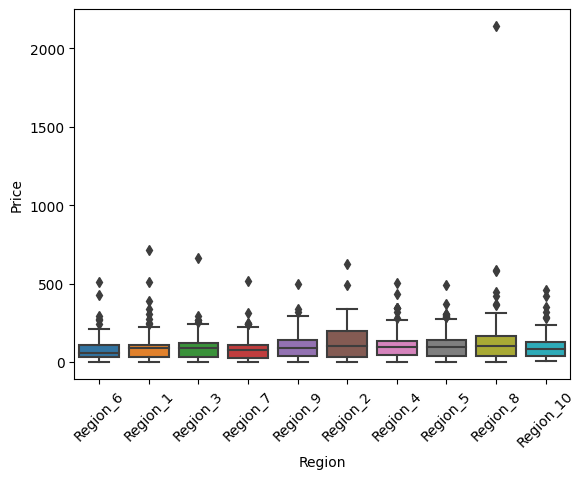

In [67]:
#Check overall distribution of "Price":  (with histplot and boxplot)
sns.boxplot(data = data, x = 'Region', y = 'Price' )
plt.xticks(rotation = 45)

In [68]:
#We found an outlier here in region 8, need to remove it
data[data['Price'] >= 1500]

,Product,Region,Price,Units Sold,Sale Date,Revenue
969,Product_15,Region_8,2143.3,5.0,2024-08-27,10716.5


In [69]:
data.drop(969, inplace = True)
data['Revenue'] = data['Price'] * data['Units Sold']
data

/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_73248/51832492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(969, inplace = True)
/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_73248/51832492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['Price'] * data['Units Sold']


,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10.0,2022-01-01,759.60
1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
995,NaN,Region_7,31.83,13.0,2024-09-22,413.79
997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Region_6'),
  Text(1, 0, 'Region_1'),
  Text(2, 0, 'Region_3'),
  Text(3, 0, 'Region_7'),
  Text(4, 0, 'Region_9'),
  Text(5, 0, 'Region_2'),
  Text(6, 0, 'Region_4'),
  Text(7, 0, 'Region_5'),
  Text(8, 0, 'Region_8'),
  Text(9, 0, 'Region_10')])

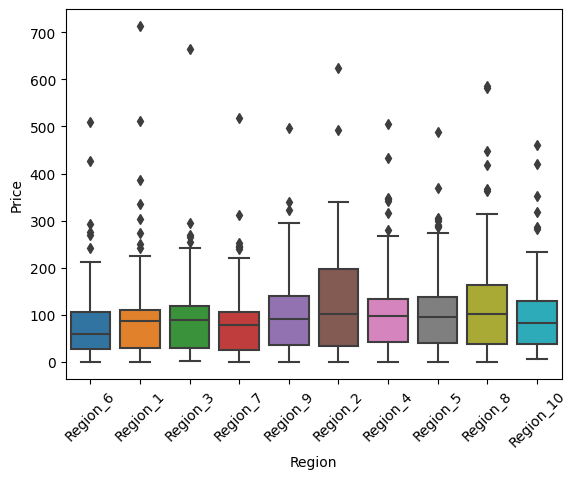

In [70]:
sns.boxplot(data = data, x = 'Region', y = 'Price' )
plt.xticks(rotation = 45)

In [96]:
#Check overall distribution of "Revenue":  (with histplot and boxplot)
data_rev = data.groupby('Region').Revenue.sum()

data_rev1 = pd.DataFrame(data_rev)
data_rev1


,Revenue
Region,
Region_1,85524.936443
Region_10,104055.542275
Region_2,98997.067103
Region_3,81863.866263
Region_4,104205.075293
Region_5,91820.443550
Region_6,75669.139653
Region_7,66077.652627
Region_8,110808.319289


In [101]:
sns.histplot(data = data_rev1, x = 'Region', y = data_rev1.col[1])


AttributeError: 'DataFrame' object has no attribute 'col'

Question:
1) What conclusions can you draw about sales performance of various products and regions?

    Based on the box plot for regions and units sold, most regions have similar sale performance with an median units sold of 10 and similar Q1 and Q3. However, region 4 and 7 have a comparably low median. Region 4 has lower IQR but more outliers. Region 7, 8 and 10 have bigger IQR, which means they are more likely to spend more on the products.

2) What recommendations do you have for the business?

    Based on the box plot for regions and prices of units sold, region 2 and 8 have a larger IQR, which means they generally spend more on products and have a better business opportunity in the future. Region 6 and 7 have both lower IQR and median, which means they may not be perfect regions to expand their business. 
    Other regions have similar IQRs and medians, it is okay to continue operation but further expansion in business may not be considered.
3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

    First of all, I dropped all the duplicates as it is possible to have the same transactions to the same regions in the same day. 
    Later I dropped all rows with unknown regions as I was unable to confirm where the products were selling to. I set up the 'Revenue' column as it can make it easier to compare the purchasing power between different regions.
    To deal with unknown price and unit sold, I filled with means using groupby as they will not change the result much. 
    In the region & price step, I drop the only outlier as it was way too big for the whole list. 